# 0. Dependencies Import 

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

2022-11-10 06:21:25.462805: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 06:21:25.605119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 06:21:25.605957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# 1. Data Import

In [4]:
dfg= pd.read_csv('../input/banking-dataset-marketing-targets/train.csv',delimiter=';') #Train dataset
dft= pd.read_csv('../input/banking-dataset-marketing-targets/test.csv',delimiter=';') #Test dataset

# 2. Data preprocessing

In [5]:
dfg

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Exploratory data analysis

In [6]:
#Creating

dfg['agecat'] = pd.cut(dfg['age'],bins=8)
dfg['daycat']=dfg['day'].astype(str)
dft['daycat']=dft['day'].astype(str)

In [7]:
dfg['durationmin']= dfg['duration']/60

conditions =  [(dfg['durationmin']<1),
              ((dfg['durationmin']>=1) & (dfg['durationmin']<2)),
              ((dfg['durationmin']>=2) & (dfg['durationmin']<3)),
              ((dfg['durationmin']>=3) & (dfg['durationmin']<4)),
              ((dfg['durationmin']>=4) & (dfg['durationmin']<5)),
              ((dfg['durationmin']>=5) & (dfg['durationmin']<6)),
              ((dfg['durationmin']>=6) & (dfg['durationmin']<7)),
              ((dfg['durationmin']>=7) & (dfg['durationmin']<8)),
              ((dfg['durationmin']>=8) & (dfg['durationmin']<9)),
              ((dfg['durationmin']>=9))]

values = ['<1','1/2','2/3','3/4','4/5','5/6','6/7','7/8','8/9','>9']

dfg['durationcat'] = np.select(conditions, values)

dfg.drop(columns='durationmin', inplace=True)

In [8]:
conditions = [(dfg['balance'] < -2500), 
              ((dfg['balance']>=-2500) & (dfg['balance']<0)), 
              ((dfg['balance']>=0) & (dfg['balance']<100)),
              ((dfg['balance']>=100) & (dfg['balance']<200)),
              ((dfg['balance']>=200) & (dfg['balance']<300)),
              ((dfg['balance']>=300) & (dfg['balance']<400)),
              ((dfg['balance']>=400) & (dfg['balance']<500)),
              ((dfg['balance']>=500) & (dfg['balance']<600)),
              ((dfg['balance']>=600) & (dfg['balance']<700)),
              ((dfg['balance']>=700) & (dfg['balance']<800)),
              ((dfg['balance']>=800) & (dfg['balance']<900)),
              ((dfg['balance']>=900) & (dfg['balance']<1000)),              
              ((dfg['balance']>=1000) & (dfg['balance']<1500)),
              ((dfg['balance']>=1500) & (dfg['balance']<2000)),
              ((dfg['balance']>=2000) & (dfg['balance']<3000)),
              ((dfg['balance']>=3000) & (dfg['balance']<4000)),
              ((dfg['balance']>=4000) & (dfg['balance']<5000)),
              ((dfg['balance']>=5000) & (dfg['balance']<10000)),
              ((dfg['balance']>=10000))]           
             

values = ['<-2.5k','-2.5k/0','0/100','100/200','200/300','300/400','400/500','500/600','600/700','700/800','800/900','900/1k','1k/1.5k','1.5k/2k','2k/3k','3k/4k','4k/5k','5k/10k','>10k']

dfg['balancecat'] = np.select(conditions, values)

In [9]:
conditions = [(dfg['campaign'] ==1), 
              (dfg['campaign']==2),
               (dfg['campaign']==3), 
              (dfg['campaign']==4),
               (dfg['campaign']==5),
              (dfg['campaign']==6),
               (dfg['campaign']==7),
              (dfg['campaign']==8),
               (dfg['campaign']==9),
              (dfg['campaign']==10),
              ((dfg['campaign']>10)&(dfg['campaign']<15)),
              ((dfg['campaign']>=15)&(dfg['campaign']<20)),
              ((dfg['campaign']>=20)&(dfg['campaign']<25)),
              ((dfg['campaign']>=25)&(dfg['campaign']<30)),
              ((dfg['campaign']>=30)&(dfg['campaign']<35)),
              ((dfg['campaign']>=35)&(dfg['campaign']<40)),              
              (dfg['campaign']>=40)]           
             

values = ['1','2','3','4','5','6','7','8','9','10','10/15','15/20','20/25','25/30','30/35','35/40','>40']

dfg['campaigncat'] = np.select(conditions, values)

In [10]:
conditions = [(dfg['pdays'] ==-1), 
              ((dfg['pdays']>0)&(dfg['pdays']<50)),
              ((dfg['pdays']>=50)&(dfg['pdays']<100)),
              ((dfg['pdays']>=100)&(dfg['pdays']<150)),
              ((dfg['pdays']>=150)&(dfg['pdays']<200)),
              ((dfg['pdays']>=200)&(dfg['pdays']<250)),
              ((dfg['pdays']>=250)&(dfg['pdays']<300)),              
              ((dfg['pdays']>=300)&(dfg['pdays']<350)), 
              ((dfg['pdays']>=350)&(dfg['pdays']<400)),
              ((dfg['pdays']>=400)&(dfg['pdays']<450)),
              ((dfg['pdays']>=450)&(dfg['pdays']<500)),
              ((dfg['pdays']>=500)&(dfg['pdays']<550)),
              (dfg['pdays']>=550)]
             

values = ['nc','0/50','50/100','100/150','150/200','200/250','250/300','300/350','350/400','400/450','450/500','500/550','>550']

dfg['pdayscat'] = np.select(conditions, values)

In [11]:
conditions = [(dft['pdays'] ==-1), 
              ((dft['pdays']>0)&(dft['pdays']<50)),
              ((dft['pdays']>=50)&(dft['pdays']<100)),
              ((dft['pdays']>=100)&(dft['pdays']<150)),
              ((dft['pdays']>=150)&(dft['pdays']<200)),
              ((dft['pdays']>=200)&(dft['pdays']<250)),
              ((dft['pdays']>=250)&(dft['pdays']<300)),              
              ((dft['pdays']>=300)&(dft['pdays']<350)), 
              ((dft['pdays']>=350)&(dft['pdays']<400)),
              ((dft['pdays']>=400)&(dft['pdays']<450)),
              ((dft['pdays']>=450)&(dft['pdays']<500)),
              ((dft['pdays']>=500)&(dft['pdays']<550)),
              ((dft['pdays']>550))]
             

values = ['nc','0/50','50/100','100/150','150/200','200/250','250/300','300/350','350/400','400/450','450/500','500/550', '>550']

dft['pdayscat'] = np.select(conditions, values)

In [12]:
conditions = [(dfg['previous'] ==1), 
              (dfg['previous']==2),
               (dfg['previous']==3), 
              (dfg['previous']==4),
               (dfg['previous']==5),
              (dfg['previous']==6),
               (dfg['previous']==7),
              (dfg['previous']==8),
               (dfg['previous']==9),
              (dfg['previous']==10),
              ((dfg['previous']>10)&(dfg['previous']<15)),
              ((dfg['previous']>=15)&(dfg['previous']<20)),
              ((dfg['previous']>=20)&(dfg['previous']<25)),
              ((dfg['previous']>=25)&(dfg['previous']<30)),
              ((dfg['previous']>=30)&(dfg['previous']<35)),
              ((dfg['previous']>=35)&(dfg['previous']<40)),              
              (dfg['previous']>=40)]           
             

values = ['1','2','3','4','5','6','7','8','9','10','10/15','15/20','20/25','25/30','30/35','35/40','>40']

dfg['previouscat'] = np.select(conditions, values)

In [13]:
def cat(df,c):
    ### This function prints the value_counts (%) and the categorical count graphs for a given categorical column C in a dataframe (df).
    for i in c:
        print('Information about', i)
        print(round((df[i].value_counts(normalize=True) * 100),2))
        sns.catplot(x = i, kind ='count', data = df, aspect = 8, height = 2, order=df[i].value_counts().index)
        plt.show()     

Information about agecat
(27.625, 37.25]     38.40
(37.25, 46.875]     25.50
(46.875, 56.5]      20.24
(56.5, 66.125]       7.60
(17.923, 27.625]     6.75
(66.125, 75.75]      0.94
(75.75, 85.375]      0.52
(85.375, 95.0]       0.06
Name: agecat, dtype: float64


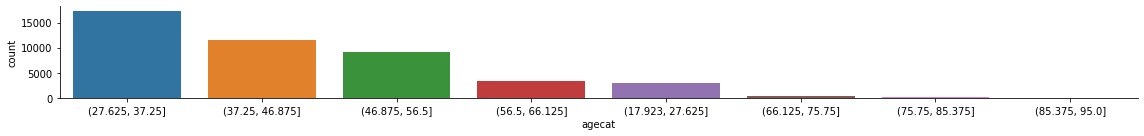

Information about job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: job, dtype: float64


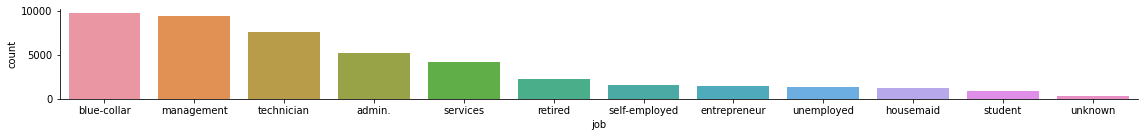

Information about marital
married     60.19
single      28.29
divorced    11.52
Name: marital, dtype: float64


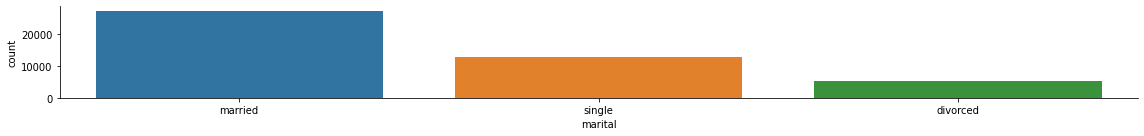

Information about education
secondary    51.32
tertiary     29.42
primary      15.15
unknown       4.11
Name: education, dtype: float64


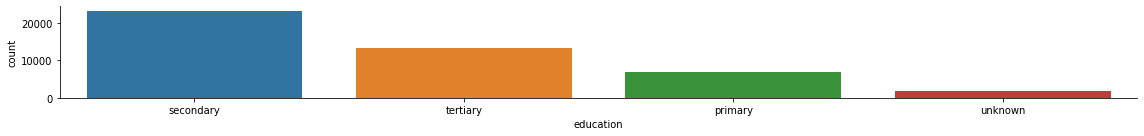

Information about default
no     98.2
yes     1.8
Name: default, dtype: float64


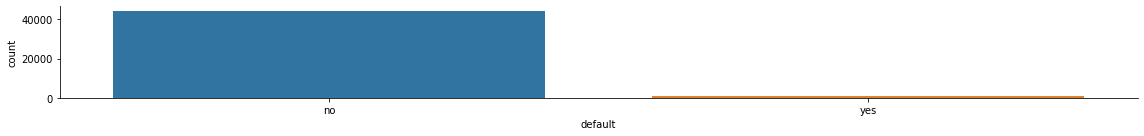

Information about balancecat
0/100      19.18
-2.5k/0     8.31
1k/1.5k     8.27
100/200     7.63
200/300     6.69
2k/3k       6.39
300/400     5.84
1.5k/2k     5.30
400/500     4.62
5k/10k      4.46
500/600     4.16
3k/4k       3.80
600/700     3.51
700/800     2.89
800/900     2.49
4k/5k       2.33
900/1k      2.28
>10k        1.83
<-2.5k      0.02
Name: balancecat, dtype: float64


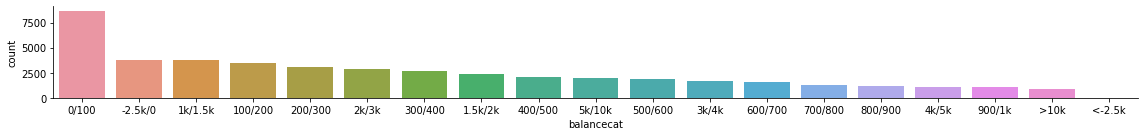

Information about housing
yes    55.58
no     44.42
Name: housing, dtype: float64


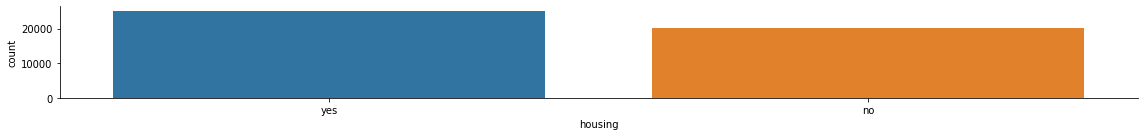

Information about loan
no     83.98
yes    16.02
Name: loan, dtype: float64


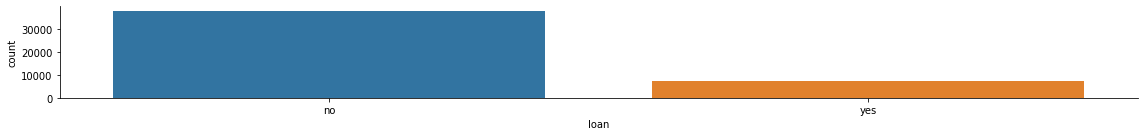

Information about contact
cellular     64.77
unknown      28.80
telephone     6.43
Name: contact, dtype: float64


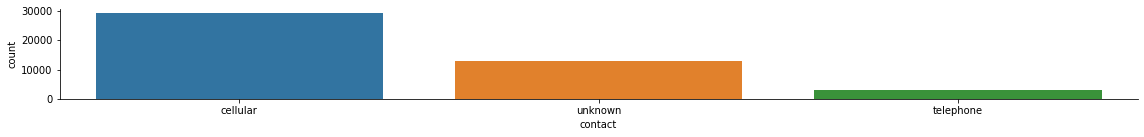

Information about daycat
20    6.09
18    5.10
21    4.48
17    4.29
6     4.27
5     4.22
14    4.09
8     4.07
28    4.05
7     4.02
19    3.89
29    3.86
15    3.77
12    3.55
13    3.51
30    3.46
9     3.45
11    3.27
4     3.20
16    3.13
2     2.86
27    2.48
3     2.39
26    2.29
23    2.08
22    2.00
25    1.86
31    1.42
10    1.16
24    0.99
1     0.71
Name: daycat, dtype: float64


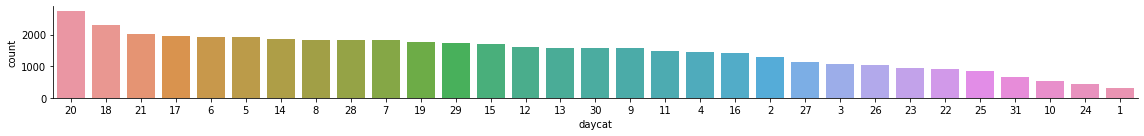

Information about month
may    30.45
jul    15.25
aug    13.82
jun    11.81
nov     8.78
apr     6.49
feb     5.86
jan     3.10
oct     1.63
sep     1.28
mar     1.06
dec     0.47
Name: month, dtype: float64


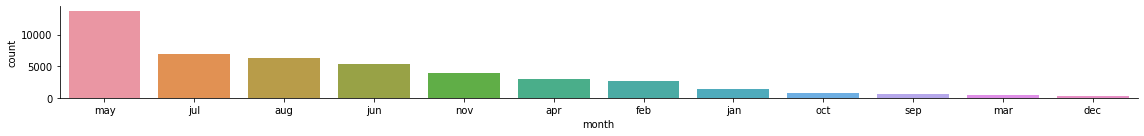

Information about durationcat
1/2    20.46
2/3    19.09
3/4    13.41
<1     10.31
>9     10.30
4/5     9.47
5/6     6.47
6/7     4.71
7/8     3.32
8/9     2.48
Name: durationcat, dtype: float64


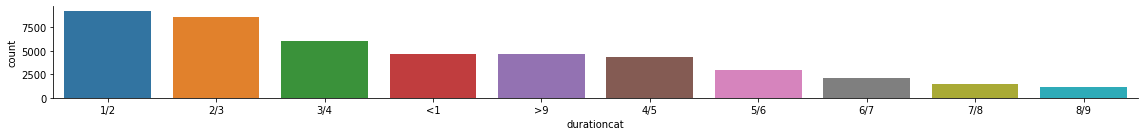

Information about campaigncat
1        38.80
2        27.66
3        12.21
4         7.79
5         3.90
6         2.86
7         1.63
10/15     1.29
8         1.19
15/20     0.72
9         0.72
10        0.59
20/25     0.32
25/30     0.17
30/35     0.09
35/40     0.03
>40       0.03
Name: campaigncat, dtype: float64


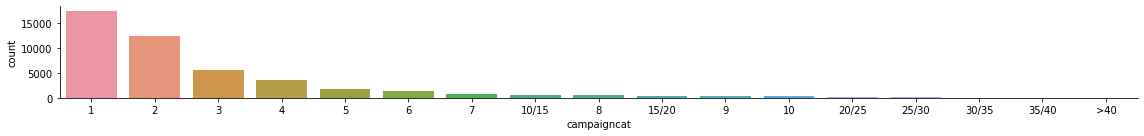

Information about pdayscat
nc         81.74
150/200     4.39
300/350     2.57
50/100      2.56
350/400     2.43
250/300     2.16
100/150     1.98
200/250     1.10
0/50        0.55
>550        0.16
450/500     0.15
400/450     0.13
500/550     0.07
Name: pdayscat, dtype: float64


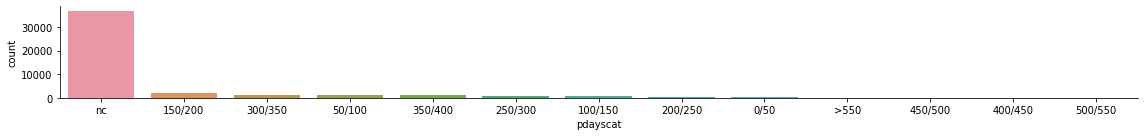

Information about previouscat
0        81.74
1         6.13
2         4.66
3         2.53
4         1.58
5         1.02
6         0.61
7         0.45
10/15     0.37
8         0.29
9         0.20
10        0.15
15/20     0.14
20/25     0.07
25/30     0.04
>40       0.01
35/40     0.01
30/35     0.01
Name: previouscat, dtype: float64


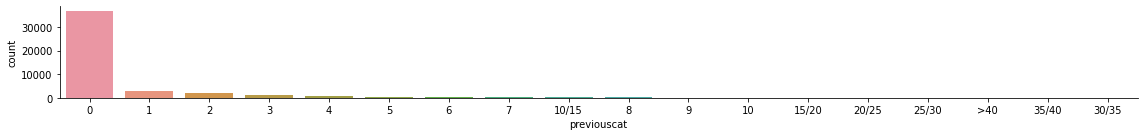

Information about poutcome
unknown    81.75
failure    10.84
other       4.07
success     3.34
Name: poutcome, dtype: float64


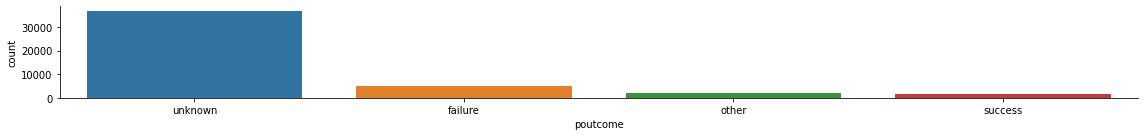

Information about y
no     88.3
yes    11.7
Name: y, dtype: float64


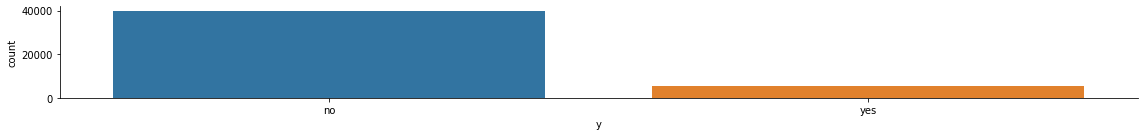

In [14]:
## Gráphs from dataframe

cat(df=dfg, c=['agecat','job','marital','education','default','balancecat','housing','loan','contact','daycat','month','durationcat','campaigncat','pdayscat','previouscat','poutcome','y'])

In [15]:
# Normalizing the train and test data with TRAINING mean and var.

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

for column in dfg.columns:
    if dfg[column].dtype in ['int64', 'float64']:
        
        X = dfg[column].array.reshape(-1,1)
        
        # build the scaler model
        scaler = MinMaxScaler()
        
        # fit using the train set
        scaler.fit(X)

        dfg[column]=scaler.transform(dfg[column].array.reshape(-1, 1)) # Apply to train
        dft[column]=scaler.transform(dft[column].array.reshape(-1, 1)) # Apply to test
        

dfg.describe()
dft.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,0.300910,0.085719,0.497176,0.053672,0.028930,0.046751,0.001973
std,0.137353,0.027324,0.274922,0.052838,0.050158,0.114818,0.006158
min,0.012987,0.042725,0.000000,0.000813,0.000000,0.000000,0.000000
25%,0.194805,0.073430,0.266667,0.021147,0.000000,0.000000,0.000000
50%,0.272727,0.076834,0.500000,0.037617,0.016129,0.000000,0.000000
75%,0.402597,0.086240,0.666667,0.066897,0.032258,0.000000,0.000000
max,0.896104,0.719109,1.000000,0.615087,0.790323,1.000000,0.090909


In [16]:
# Creating outlier column where has value 1 if the value is an outlier and 0 if the value is not an outlier.

for column in ['age','balance','duration','campaign','previous']:
    if dfg[column].dtype in ['int64', 'float64']:

        Q1 = dfg[column].quantile(0.25)
        Q3 = dfg[column].quantile(0.75)
        IQR = Q3 - Q1

        low= (Q1 - 1.5 * IQR)
        high = (Q3 + 1.5 * IQR)

        conditions = [ ((dfg[column] < low) | (dfg[column] > high) ) , ( (dfg[column] >= low) |  (dfg[column] <= high) ) ]         

        values = [1,0]

        dfg['out_'+str(column)] = np.select(conditions, values) 

        print(dfg['out_'+str(column)].value_counts(normalize=False))

0    44724
1      487
Name: out_age, dtype: int64
0    40480
1     4731
Name: out_balance, dtype: int64
0    41976
1     3235
Name: out_duration, dtype: int64
0    42147
1     3064
Name: out_campaign, dtype: int64
0    36954
1     8257
Name: out_previous, dtype: int64


In [17]:
for column in ['age','balance','duration','campaign','previous']:
    if dft[column].dtype in ['int64', 'float64']:

        Q1 = dft[column].quantile(0.25)
        Q3 = dft[column].quantile(0.75)
        IQR = Q3 - Q1

        low= (Q1 - 1.5 * IQR)
        high = (Q3 + 1.5 * IQR)

        conditions = [ ((dft[column] < low) | (dft[column] > high) ) , ( (dft[column] >= low) |  (dft[column] <= high) ) ]         

        values = [1,0]

        dft['out_'+str(column)] = np.select(conditions, values) 

        print(dft['out_'+str(column)].value_counts(normalize=False))

0    4477
1      44
Name: out_age, dtype: int64
0    4015
1     506
Name: out_balance, dtype: int64
0    4191
1     330
Name: out_duration, dtype: int64
0    4203
1     318
Name: out_campaign, dtype: int64
0    3705
1     816
Name: out_previous, dtype: int64


In [18]:
# Creating a column that indentifies if the element was missing for each column with missing values

col_missing = ['poutcome', 'contact', 'education', 'job']

for col in col_missing:
    conditions = [dfg[col]=='unknown',dfg[col]!='unknown']           
    
    values = [1,0]    
    
    dfg[col+'_was_missing'] = np.select(conditions, values)   
    
for col in col_missing:
    conditions = [dft[col]=='unknown',dft[col]!='unknown']           
    
    values = [1,0]    
    
    dft[col+'_was_missing'] = np.select(conditions, values)  

In [19]:
# We have 'unknown' data in ['poutcome', 'contact', 'education', 'job']

j= 100 * len(dfg[dfg['job']=='unknown']) / dfg.shape[0]
e= 100 * len(dfg[dfg['education']=='unknown']) / dfg.shape[0]
p= 100 * len(dfg[dfg['poutcome']=='unknown']) / dfg.shape[0]
c= 100 * len(dfg[dfg['contact']=='unknown']) / dfg.shape[0]


print('The % of unknown in job is', j)
print('The % of unknown in education is', e)
print('The % of unknown in poutcome is', p)
print('The % of unknown in contact is', c)

The % of unknown in job is 0.6370131162770122
The % of unknown in education is 4.1074074893278185
The % of unknown in poutcome is 81.74780473778505
The % of unknown in contact is 28.798301298356595


In [20]:
dfg[dfg['job']=='unknown']['education'].value_counts()

# The job will be matched with the education mode and the unknowns will be dropped.

unknown      127
secondary     71
primary       51
tertiary      39
Name: education, dtype: int64

In [21]:
indexNeg = dfg[(dfg['job']=='unknown') & (dfg['education']=='unknown')].index # Creating the set of rows to be dropped

dfg.drop(indexNeg, inplace=True) # Droping the rows

In [22]:
indexNeg = dft[(dft['job']=='unknown') & (dft['education']=='unknown')].index # Creating the set of rows to be dropped

dft.drop(indexNeg, inplace=True) # Droping the rows

In [23]:
# Finding the mode's

print('Primary education JOB mode is:', dfg[dfg['education']=='primary']['job'].value_counts(normalize=True).nlargest(3))

print('Secondary education JOB mode is', dfg[dfg['education']=='secondary']['job'].value_counts(normalize=True).nlargest(3))

print('Tertiary education JOB mode is', dfg[dfg['education']=='tertiary']['job'].value_counts(normalize=True).nlargest(3))

Primary education JOB mode is: blue-collar    0.548533
retired        0.116041
housemaid      0.091519
Name: job, dtype: float64
Secondary education JOB mode is blue-collar    0.231489
technician     0.225369
admin.         0.181838
Name: job, dtype: float64
Tertiary education JOB mode is management       0.586497
technician       0.147959
self-employed    0.062627
Name: job, dtype: float64


In [24]:
# We see that tertiary and primary educations have a majority JOB but secundary dont, we'll pick the secondary randomly the three largest presences.



# TRAIN DATA

dfg['job'] = np.where( ((dfg.job == 'unknown')& (dfg.education =='primary')),'blue-collar',dfg.job)


dfg['job'] = np.where( ((dfg.job == 'unknown')& (dfg.education =='tertiary')),'management',dfg.job)

import random

secjobs=['blue-collar','technician','admin.']
i=0
while i <74:
    p=random.choice(secjobs)
    dfg['job'] = np.where( ((dfg.job == 'unknown')&(dfg.education =='secondary')),p,dfg.job)
    i=i+1

# TEST DATA

dft['job'] = np.where( ((dft.job == 'unknown')& (dft.education =='primary')),'blue-collar',dft.job)


dft['job'] = np.where( ((dft.job == 'unknown')& (dft.education =='tertiary')),'management',dft.job)

import random

secjobs=['blue-collar','technician','admin.']
i=0
while i <74:
    p=random.choice(secjobs)
    dft['job'] = np.where( ((dft.job == 'unknown')&(dft.education =='secondary')),p,dft.job)
    i=i+1    

In [25]:
dfg[dfg['education']=='unknown']['job'].value_counts()

blue-collar      454
technician       242
management       242
admin.           171
student          163
services         150
retired          119
entrepreneur      76
housemaid         45
self-employed     39
unemployed        29
Name: job, dtype: int64

In [26]:
# Finding the mode's

print('JOB Blue-Collar education mode is:', dfg[dfg['job']=='blue-collar']['education'].value_counts(normalize=True).nlargest(2))

print('JOB technician education mode is:', dfg[dfg['job']=='technician']['education'].value_counts(normalize=True).nlargest(2))

print('JOB management education mode is:', dfg[dfg['job']=='management']['education'].value_counts(normalize=True).nlargest(2))

print('JOB admin education mode is:', dfg[dfg['job']=='admin.']['education'].value_counts(normalize=True).nlargest(2))

print('JOB student education mode is:', dfg[dfg['job']=='student']['education'].value_counts(normalize=True).nlargest(2))

print('JOB services education mode is:', dfg[dfg['job']=='services']['education'].value_counts(normalize=True).nlargest(2))

print('JOB retired education mode is:', dfg[dfg['job']=='retired']['education'].value_counts(normalize=True).nlargest(2))

print('JOB entrepreneur education mode is:', dfg[dfg['job']=='entrepreneur']['education'].value_counts(normalize=True).nlargest(2))

print('JOB housemaid education mode is:', dfg[dfg['job']=='housemaid']['education'].value_counts(normalize=True).nlargest(2))

print('JOB self-employed education mode is:', dfg[dfg['job']=='self-employed']['education'].value_counts(normalize=True).nlargest(2))

print('JOB unemployed education mode is:', dfg[dfg['job']=='unemployed']['education'].value_counts(normalize=True).nlargest(2))

JOB Blue-Collar education mode is: secondary    0.549014
primary      0.389349
Name: education, dtype: float64
JOB technician education mode is: secondary    0.691184
tertiary     0.256651
Name: education, dtype: float64
JOB management education mode is: tertiary     0.825524
secondary    0.118037
Name: education, dtype: float64
JOB admin education mode is: secondary    0.815896
tertiary     0.110617
Name: education, dtype: float64
JOB student education mode is: secondary    0.541578
tertiary     0.237740
Name: education, dtype: float64
JOB services education mode is: secondary    0.832210
primary      0.083052
Name: education, dtype: float64
JOB retired education mode is: secondary    0.434629
primary      0.351148
Name: education, dtype: float64
JOB entrepreneur education mode is: tertiary     0.461332
secondary    0.364492
Name: education, dtype: float64
JOB housemaid education mode is: primary      0.505645
secondary    0.318548
Name: education, dtype: float64
JOB self-employed edu

In [27]:
# Using the Modes

s=['blue-collar', 'technician', 'admin.' ,'student', 'education', 'retired', 'services' ,'unemployed']
t=['management','entrepreneur','self-employed']

# TRAIN DATA

for job in s:
    dfg['education'] = np.where( ((dfg.education == 'unknown')& (dfg.job ==job)),'secondary',dfg.education)
    
for job in t:
    dfg['education'] = np.where( ((dfg.education == 'unknown')& (dfg.job ==job)),'tertiary',dfg.education)
    
dfg['education'] = np.where( ((dfg.education == 'unknown')& (dfg.job =='housemaid')),'primary',dfg.education)


#TEST DATA

for job in s:
    dft['education'] = np.where( ((dft.education == 'unknown')& (dft.job ==job)),'secondary',dft.education)
    
for job in t:
    dft['education'] = np.where( ((dft.education == 'unknown')& (dft.job ==job)),'tertiary',dft.education)
    
dft['education'] = np.where( ((dft.education == 'unknown')& (dft.job =='housemaid')),'primary',dft.education)

In [28]:
dfg['contact'].value_counts()

cellular     29236
unknown      12966
telephone     2882
Name: contact, dtype: int64

In [29]:
## DONT LIKE THIS

#TRAIN

dfg['contact'] = np.where( (dfg.contact == 'unknown'),'cellular',dfg.contact)

#TEST

dft['contact'] = np.where( (dft.contact == 'unknown'),'cellular',dft.contact)

In [30]:
dfg['contact'].value_counts()

cellular     42202
telephone     2882
Name: contact, dtype: int64

In [31]:
round(dfg['poutcome'].value_counts(normalize=True)*100,2)

unknown    81.72
failure    10.86
other       4.08
success     3.34
Name: poutcome, dtype: float64

In [32]:
# Since most of the poutcome is 'unknown' any attempt to replace them will bring a lot of BIAS so we'll discard the column

dfg.drop(columns=['poutcome','poutcome_was_missing'],inplace=True)
dft.drop(columns=['poutcome','poutcome_was_missing'],inplace=True)

In [33]:
# Day of the Month realy is not relevant for a model

dfg.drop(columns=['day'],inplace=True)
dft.drop(columns=['day'],inplace=True)

# Dropping the categorical columns we created. Except for 'pdayscat' and 'daycat', since both these features have numerical values that may influence badly the ML model.

dfg['TARGET']=dfg['y']
dft['TARGET']=dft['y']

a= dfg['TARGET']
b= dft['TARGET']

dfg.drop(columns=['TARGET','daycat','y','agecat','balancecat','durationcat','campaigncat','pdays','previouscat'],inplace=True)
dft.drop(columns=['TARGET','daycat','y','pdays'],inplace=True)

In [34]:
dfg = dfg.reset_index(drop=True)

from sklearn import preprocessing
    
def label_encoder(dfg,column):
    le=preprocessing.LabelEncoder()
    le.fit_transform(dfg[column])
    ohe = preprocessing.OneHotEncoder()
    temp_array= ohe.fit_transform(dfg[[column]]).toarray()
    column_names = [column+"_"+str(m) for m in le.classes_]
    return(pd.DataFrame(temp_array,columns=column_names))
     
numerical_variables = [col for col in dfg.columns if dfg[col].dtype in ['int64', 'float64']] # Got this wise bit of code from the amazing 'Andrada Olteanu'.

print(numerical_variables)

categorical_variables = [col for col in dfg.columns if dfg[col].dtype == 'object'] # Got this wise bit of code from the amazing 'Andrada Olteanu'.

new_df = dfg[numerical_variables]

for column in categorical_variables:
    new_df = pd.concat([new_df,label_encoder(dfg,column)],axis=1)
    
# Label Encoder Target

le = preprocessing.LabelEncoder()
le.fit(a)

new_df['TARGET'] = le.transform(a)

new_df.columns

## new_df is the TRAINING dataframe encoded

['age', 'balance', 'duration', 'campaign', 'previous', 'out_age', 'out_balance', 'out_duration', 'out_campaign', 'out_previous', 'contact_was_missing', 'education_was_missing', 'job_was_missing']


Index(['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdayscat_0/50', 'pdayscat_100/150', 'pdayscat_150/200',
       'pdayscat_200/250', 'pdayscat_250/300', 'pdayscat_300/350'

In [35]:
dft = dft.reset_index(drop=True)

from sklearn import preprocessing
    
def label_encoder(dft,column):
    le=preprocessing.LabelEncoder()
    le.fit_transform(dft[column])
    ohe = preprocessing.OneHotEncoder()
    temp_array= ohe.fit_transform(dft[[column]]).toarray()
    column_names = [column+"_"+str(m) for m in le.classes_]
    return(pd.DataFrame(temp_array,columns=column_names))
     

numerical_variables = [col for col in dft.columns if dft[col].dtype in ['int64', 'float64']] # Got this wise bit of code from the amazing 'Andrada Olteanu'.

categorical_variables = [col for col in dft.columns if dft[col].dtype == 'object'] # Got this wise bit of code from the amazing 'Andrada Olteanu'.

new_dft = dft[numerical_variables]

for column in categorical_variables:
    new_dft = pd.concat([new_dft,label_encoder(dft,column)],axis=1)
    
    
# Label Encoder Target

le = preprocessing.LabelEncoder()
le.fit(b)

new_dft['TARGET'] = le.transform(b)

new_dft.columns
## new_dft is the TEST dataframe encoded.

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdayscat_0/50', 'pdayscat_100/150', 'pdayscat_150/200',
       'pdayscat_200/250', 'pdayscat_250/300', 'pdayscat_300/350'

In [36]:
## dfg is the training dataframe encoded, dft is the test dataframe encoded.

dfg= new_df.copy()

dft= new_dft.copy()

print(dfg.shape)

print(dft.shape)

(45084, 64)
(4506, 64)


In [37]:
dfg.describe()

,age,balance,duration,campaign,previous,out_age,out_balance,out_duration,out_campaign,out_previous,...,pdayscat_250/300,pdayscat_300/350,pdayscat_350/400,pdayscat_400/450,pdayscat_450/500,pdayscat_50/100,pdayscat_500/550,pdayscat_>550,pdayscat_nc,TARGET
count,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,...,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000
mean,0.297550,0.085158,0.052496,0.028424,0.002114,0.010691,0.104583,0.071555,0.067674,0.182903,...,0.021648,0.025796,0.024399,0.001353,0.001442,0.025574,0.000732,0.001619,0.817097,0.116915
std,0.137791,0.027627,0.052376,0.049906,0.008386,0.102845,0.306018,0.257753,0.251188,0.386591,...,0.145535,0.158529,0.154286,0.036759,0.037943,0.157864,0.027045,0.040207,0.386591,0.321323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.020943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.272727,0.076871,0.036600,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.389610,0.085732,0.064864,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


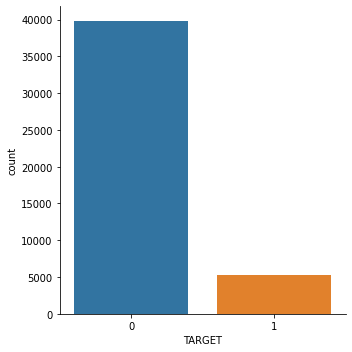

In [38]:
sns.catplot(data=dfg, x='TARGET', kind ='count')

In [39]:
# Find correlations with the target and sort
correlations = dfg.corr()['TARGET'].sort_values()

# Display correlations
correlations

pdayscat_nc           -0.166943
contact_was_missing   -0.150511
housing_yes           -0.139272
month_may             -0.102540
campaign              -0.073086
                         ...   
out_previous           0.166943
pdayscat_50/100        0.186806
out_duration           0.340086
duration               0.394545
TARGET                 1.000000
Name: TARGET, Length: 64, dtype: float64

In [40]:
X_test = dft[['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdayscat_0/50', 'pdayscat_100/150', 'pdayscat_150/200',
       'pdayscat_200/250', 'pdayscat_250/300', 'pdayscat_300/350',
       'pdayscat_350/400', 'pdayscat_400/450', 'pdayscat_450/500',
       'pdayscat_50/100', 'pdayscat_500/550', 'pdayscat_>550', 'pdayscat_nc']]

y_test = dft['TARGET']

### Balancing Classes with SMOTE

In [41]:
# Finding the RATIO of Imbalance of classes in our training data set

df= pd.read_csv('../input/banking-dataset-marketing-targets/train.csv',delimiter=';') #Train dataset

a= len(df[df['y']=='yes'])/len(df[df['y']=='no'])

print("The ratio Yes/No is",round(a,3),"Yes to one No or for each Yes there is 7.42 No's")

The ratio Yes/No is 0.132 Yes to one No or for each Yes there is 7.42 No's


In [42]:
# Data Augmentantion

from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(dfg[['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdayscat_0/50', 'pdayscat_100/150', 'pdayscat_150/200',
       'pdayscat_200/250', 'pdayscat_250/300', 'pdayscat_300/350',
       'pdayscat_350/400', 'pdayscat_400/450', 'pdayscat_450/500',
       'pdayscat_50/100', 'pdayscat_500/550', 'pdayscat_>550', 'pdayscat_nc']], dfg['TARGET'])

y_train_resampled.value_counts()

0    39813
1    39813
Name: TARGET, dtype: int64

In [43]:
X_test_resampled, y_test_resampled = SMOTE().fit_resample(dft[['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdayscat_0/50', 'pdayscat_100/150', 'pdayscat_150/200',
       'pdayscat_200/250', 'pdayscat_250/300', 'pdayscat_300/350',
       'pdayscat_350/400', 'pdayscat_400/450', 'pdayscat_450/500',
       'pdayscat_50/100', 'pdayscat_500/550', 'pdayscat_>550', 'pdayscat_nc']], dft['TARGET'])

y_test_resampled.value_counts()

0    3988
1    3988
Name: TARGET, dtype: int64

In [44]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(79626, 63)
(79626,)


In [45]:
print(X_test.shape)
print(y_test.shape)

(4506, 63)
(4506,)


In [46]:
y_test.value_counts()

0    3988
1     518
Name: TARGET, dtype: int64

In [47]:
y_train_resampled.value_counts()

0    39813
1    39813
Name: TARGET, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

def split_data(X, Y):
    x_tr, x_val, y_tr, y_val = train_test_split(
        X,
        Y,
        test_size=0.2,
        random_state=0,
        shuffle=True,
    )

    return x_tr, x_val, y_tr, y_val

In [49]:
x_tr, x_val, y_tr, y_val = split_data(X_train_resampled, y_train_resampled)

### Test with 1 Layer NN

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [78]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(32, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ]
)

In [51]:
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precision_score = precision(y_true, y_pred)
    recall_score = recall(y_true, y_pred)
    return 2*((precision_score*recall_score)/(precision_score+recall_score+K.epsilon()))

In [80]:
# compile the keras model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1,precision, recall])

In [81]:
# fit the keras model on the dataset
history = model.fit(x_tr, y_tr, epochs=200, batch_size=128, validation_data = (x_val, y_val))

Epoch 1/200
498/498 [==============================] - 3s 4ms/step - loss: 0.4605 - acc: 0.7921 - f1: 0.7841 - precision: 0.8001 - recall: 0.7758 - val_loss: 0.3903 - val_acc: 0.8365 - val_f1: 0.8337 - val_precision: 0.8566 - val_recall: 0.8139
Epoch 2/200
498/498 [==============================] - 2s 3ms/step - loss: 0.3564 - acc: 0.8543 - f1: 0.8538 - precision: 0.8494 - recall: 0.8610 - val_loss: 0.3315 - val_acc: 0.8693 - val_f1: 0.8760 - val_precision: 0.8394 - val_recall: 0.9177
Epoch 3/200
498/498 [==============================] - 2s 3ms/step - loss: 0.3173 - acc: 0.8699 - f1: 0.8722 - precision: 0.8492 - recall: 0.8991 - val_loss: 0.3158 - val_acc: 0.8681 - val_f1: 0.8699 - val_precision: 0.8649 - val_recall: 0.8768
Epoch 4/200
498/498 [==============================] - 2s 3ms/step - loss: 0.3051 - acc: 0.8758 - f1: 0.8788 - precision: 0.8509 - recall: 0.9110 - val_loss: 0.3036 - val_acc: 0.8757 - val_f1: 0.8815 - val_precision: 0.8494 - val_recall: 0.9176
Epoch 5/200
498/498 

In [83]:
model.evaluate(x_tr, y_tr)

1991/1991 [==============================] - 4s 2ms/step - loss: 0.1943 - acc: 0.9226 - f1: 0.9229 - precision: 0.8958 - recall: 0.9563


[0.1943405568599701,
 0.9225745797157288,
 0.9228878021240234,
 0.8958397507667542,
 0.9562657475471497]

In [84]:
model.evaluate(x_val, y_val)

498/498 [==============================] - 1s 2ms/step - loss: 0.2562 - acc: 0.9027 - f1: 0.9047 - precision: 0.8775 - recall: 0.9391


[0.25621363520622253,
 0.9026748538017273,
 0.9047026634216309,
 0.8774840235710144,
 0.939056932926178]

In [85]:
model.evaluate(X_test, y_test)

141/141 [==============================] - 0s 2ms/step - loss: 0.2869 - acc: 0.8737 - f1: 0.5851 - precision: 0.4716 - recall: 0.8428


[0.28689754009246826,
 0.8737239241600037,
 0.5851011872291565,
 0.47163325548171997,
 0.8427531123161316]

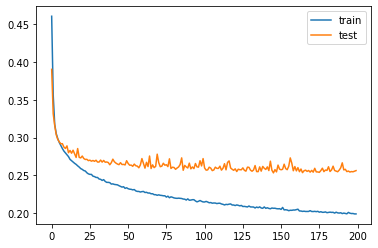

In [82]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

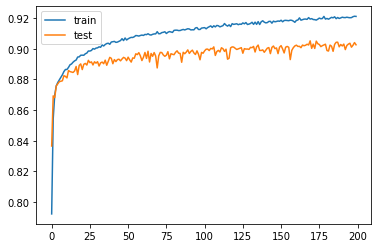

In [86]:
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

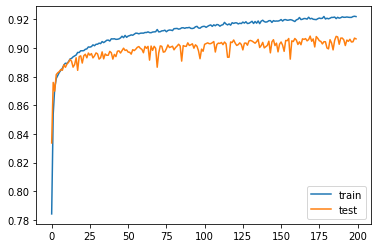

In [87]:
pyplot.plot(history.history['f1'], label='train')
pyplot.plot(history.history['val_f1'], label='test')
pyplot.legend()
pyplot.show()

# 3. Parameters setting

In [75]:
INPUT_NEURONS = x_tr.shape[1]
OUTPUT_NEURONS = 1

MAX_LAYER = 8
ITER = 10
P_MAX = 20
BATCH_SIZE = 256
EPOCH = 150
NODE_CHANGE = 1

UPPER_LIMIT = INPUT_NEURONS + OUTPUT_NEURONS
LOWER_LIMIT = 0

PROPABILITY = 0.5

# 4. Utility functions

In [53]:
def create_model(solution):
    model = keras.Sequential()
    for layer in range(solution[0]):
        model.add(layers.Dense(solution[1][layer], activation="relu"))
    model.add(layers.Dense(OUTPUT_NEURONS, activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1, precision, recall])
    return model

In [54]:
def calculate_fitness(solution, epoch = EPOCH, batch_size = BATCH_SIZE):
    model = create_model(solution)
    model.fit(x_tr, y_tr, epochs=epoch, batch_size=batch_size, validation_data = (x_val, y_val), verbose = 0)
    loss, accuracy, f1, precision, recall = model.evaluate(X_test_resampled, y_test_resampled)
    print('Architecture with ', solution[0], ' layers with each layer has ', solution[1], ' nodes', ' has evaluation of ', [accuracy, f1, precision, recall])
    return [solution[0], solution[1], [accuracy, f1, precision, recall]]

In [55]:
def generate_neighbor(current_solution, Tabu_list):
    candidate_list = list()
    number_of_layer = current_solution[0]
    increasing_N_list = current_solution[1].copy()
    decreasing_N_list = current_solution[1].copy()
    
    visited_solution = [solution[1] for solution in Tabu_list.copy()]
    
    for i in range((int)(P_MAX/2)):
        for layer in range(number_of_layer):
            if random.uniform(0, 1) >= PROPABILITY and increasing_N_list[layer] + NODE_CHANGE <= UPPER_LIMIT:
                increasing_N_list[layer] = increasing_N_list[layer] + NODE_CHANGE
                
        if increasing_N_list not in visited_solution:
            candidate_list += [calculate_fitness([number_of_layer, increasing_N_list, []], EPOCH, BATCH_SIZE)]
            visited_solution += [increasing_N_list]
    
    for i in range((int)(P_MAX/2)):
        for layer in range(number_of_layer):
            if random.uniform(0, 1) >= PROPABILITY and decreasing_N_list[layer] - NODE_CHANGE > LOWER_LIMIT:
                decreasing_N_list[layer]= decreasing_N_list[layer] - NODE_CHANGE
                
        if decreasing_N_list not in visited_solution:
            candidate_list += [calculate_fitness([number_of_layer, decreasing_N_list, []], EPOCH, BATCH_SIZE)]
            visited_solution += [decreasing_N_list]
    
    best_neighbor_solution = candidate_list[0]
    for ret in candidate_list:
        if ret[-1][0] > best_neighbor_solution[-1][0]:
            best_neighbor_solution = ret
    
    return best_neighbor_solution

In [56]:
def initialize(number_of_layer):
    N_list = list()
    evaluation = list()
    for layer in range(number_of_layer):
        a = (int)((INPUT_NEURONS + OUTPUT_NEURONS) / 2)
        b = (int)((INPUT_NEURONS + OUTPUT_NEURONS) * 2 / 3)
        number_of_nodes = random.randint(a, b)
        N_list += [number_of_nodes]
    
    return number_of_layer, N_list, evaluation

# 5. Tabu search

In [76]:
def tabu_search():
    solution_list = list() # for each layer size
    Tabu_list = list()
    
    for number_of_layer in range(6, MAX_LAYER + 1):
        init_solution = initialize(number_of_layer)
        init_solution = calculate_fitness(init_solution, EPOCH, BATCH_SIZE)
        best_solution = init_solution
        current_solution = init_solution
        Tabu_list += [init_solution]
        
        for i in range(ITER):
            neighbor_best_solution = generate_neighbor(current_solution, Tabu_list)
            if neighbor_best_solution[-1][0] > best_solution[-1][0]: # accuracy comparison
                best_solution = neighbor_best_solution
                current_solution = neighbor_best_solution
            else:
                Tabu_list += [neighbor_best_solution]
                current_solution = neighbor_best_solution
                
        solution_list += [best_solution]
    
    return solution_list
            

In [59]:
# 1 - 5
solution_list = tabu_search()
solution_list

2022-11-10 06:22:46.111608: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 06:22:46.112089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 06:22:46.113055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 06:22:46.113789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

250/250 [==============================] - 1s 2ms/step - loss: 0.2459 - acc: 0.9012 - f1: 0.7426 - precision: 0.6928 - recall: 0.8684
Architecture with  1  layers with each layer has  [34]  nodes  has evaluation of  [0.9012036323547363, 0.7425676584243774, 0.6927502155303955, 0.8683578968048096]
250/250 [==============================] - 1s 2ms/step - loss: 0.2262 - acc: 0.9068 - f1: 0.7421 - precision: 0.7014 - recall: 0.8479
Architecture with  1  layers with each layer has  [35]  nodes  has evaluation of  [0.9068455100059509, 0.7420888543128967, 0.7013853192329407, 0.8478682637214661]
250/250 [==============================] - 1s 2ms/step - loss: 0.2498 - acc: 0.8968 - f1: 0.7332 - precision: 0.6921 - recall: 0.8448
Architecture with  1  layers with each layer has  [33]  nodes  has evaluation of  [0.8968154191970825, 0.7332229614257812, 0.6920847296714783, 0.8448377847671509]
250/250 [==============================] - 1s 2ms/step - loss: 0.2213 - acc: 0.9070 - f1: 0.7426 - precision:

[[1,
  [45],
  [0.9106068015098572,
   0.7458827495574951,
   0.6982210874557495,
   0.863434910774231]],
 [2,
  [59, 57],
  [0.93342524766922,
   0.7895212769508362,
   0.7669183611869812,
   0.8558932542800903]],
 [3,
  [40, 36, 40],
  [0.9305416345596313,
   0.7876750826835632,
   0.7585448026657104,
   0.8627496361732483]],
 [4,
  [53, 48, 53, 58],
  [0.942703127861023,
   0.8222239017486572,
   0.7805466651916504,
   0.9170923829078674]],
 [5,
  [60, 51, 55, 55, 58],
  [0.9432046413421631,
   0.828055202960968,
   0.7950872778892517,
   0.9073821306228638]]]

In [67]:
solution = solution_list[2]
print(f'Architecture: {solution[1]}')
model = create_model(solution)
history = model.fit(x_tr, y_tr, epochs=250, batch_size=512, validation_data = (x_val, y_val), verbose = 1)
evaluation = model.evaluate(X_test_resampled, y_test_resampled)

Architecture: [40, 36, 40]
Epoch 1/250
125/125 [==============================] - 1s 5ms/step - loss: 0.5197 - acc: 0.7551 - f1: 0.7584 - precision: 0.7589 - recall: 0.7626 - val_loss: 0.4281 - val_acc: 0.8178 - val_f1: 0.8189 - val_precision: 0.8289 - val_recall: 0.8101
Epoch 2/250
125/125 [==============================] - 0s 3ms/step - loss: 0.4074 - acc: 0.8299 - f1: 0.8260 - precision: 0.8409 - recall: 0.8128 - val_loss: 0.3826 - val_acc: 0.8422 - val_f1: 0.8426 - val_precision: 0.8596 - val_recall: 0.8268
Epoch 3/250
125/125 [==============================] - 0s 4ms/step - loss: 0.3593 - acc: 0.8530 - f1: 0.8527 - precision: 0.8511 - recall: 0.8553 - val_loss: 0.3394 - val_acc: 0.8593 - val_f1: 0.8603 - val_precision: 0.8681 - val_recall: 0.8531
Epoch 4/250
125/125 [==============================] - 0s 3ms/step - loss: 0.3261 - acc: 0.8674 - f1: 0.8693 - precision: 0.8529 - recall: 0.8878 - val_loss: 0.3139 - val_acc: 0.8709 - val_f1: 0.8741 - val_precision: 0.8602 - val_recall: 

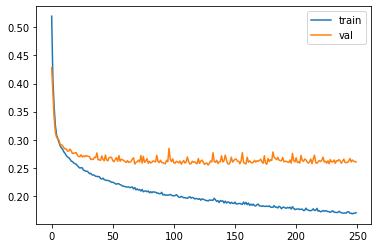

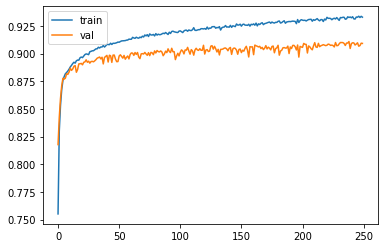

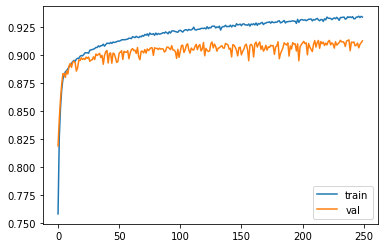

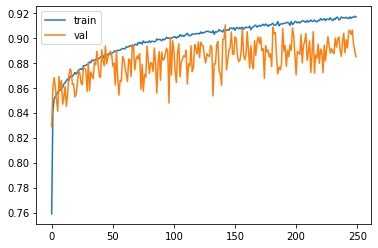

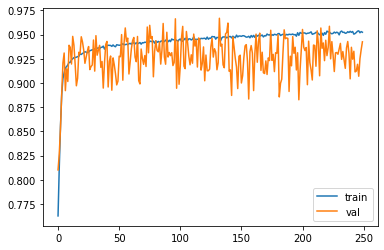

In [72]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='val')
pyplot.legend()
pyplot.show()

pyplot.plot(history.history['f1'], label='train')
pyplot.plot(history.history['val_f1'], label='val')
pyplot.legend()
pyplot.show()

pyplot.plot(history.history['precision'], label='train')
pyplot.plot(history.history['val_precision'], label='val')
pyplot.legend()
pyplot.show()

pyplot.plot(history.history['recall'], label='train')
pyplot.plot(history.history['val_recall'], label='val')
pyplot.legend()
pyplot.show()

In [70]:
evaluation

[0.18424147367477417,
 0.9270310997962952,
 0.7842355966567993,
 0.7326864004135132,
 0.9048190712928772]

In [74]:
from sklearn.model_selection import KFold

N_SPLIT = 10
EPOCHS = 250
BATCH_SIZE = 256

for solution in solution_list:
    print('------------------------------------------------------------------------')
    print(f'NUMBER OF LAYER: {solution[0]}\n\n')
    acc_per_fold = list()
    f1_per_fold = list()
    prec_per_fold = list()
    rec_per_fold = list()
    loss_per_fold = list()
    # Define the K-fold Cross Validator
    kfold = KFold(n_splits= N_SPLIT, shuffle=True)

    # K-fold Cross Validation model evaluation
    fold_no = 1

    for train, test in kfold.split(X_train_resampled, y_train_resampled):

        model = create_model(solution)

        # Generate a print
        print(f'Training for fold {fold_no} ...')

        # Fit data to model
        history = model.fit(X_train_resampled.iloc[train], y_train_resampled.iloc[train],
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose = 0)

        # Generate generalization metrics
        scores = model.evaluate(X_train_resampled.iloc[test], y_train_resampled.iloc[test], verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {round(scores[1]*100, 4)} %; {model.metrics_names[2]} of {round(scores[2]*100, 4)} %; {model.metrics_names[3]} of {round(scores[3]*100, 4)} %; {model.metrics_names[4]} of {round(scores[4]*100, 4)} %')
        acc_per_fold.append(scores[1] * 100)
        f1_per_fold.append(scores[2] * 100)
        prec_per_fold.append(scores[3] * 100)
        rec_per_fold.append(scores[4] * 100)
        loss_per_fold.append(scores[0])

        # Increase fold number
        fold_no = fold_no + 1
    
    print(f'For Neural Network with {solution[0]} layers, Cross Validation Mean Score:\n accuracy: {sum(acc_per_fold) / len(acc_per_fold)} \n f1: {sum(f1_per_fold) / len(f1_per_fold)} \n precision: {sum(prec_per_fold) / len(prec_per_fold)} \n recall: {sum(rec_per_fold) / len(rec_per_fold)}')
    

------------------------------------------------------------------------
NUMBER OF LAYER: 1


Training for fold 1 ...
Score for fold 1: loss of 0.24464909732341766; acc of 90.5438 %; f1 of 67.9042 %; precision of 65.0066 %; recall of 77.3867 %
Training for fold 2 ...
Score for fold 2: loss of 0.2605113387107849; acc of 89.2628 %; f1 of 67.1376 %; precision of 64.8623 %; recall of 77.8621 %
Training for fold 3 ...
Score for fold 3: loss of 0.2722349166870117; acc of 89.8907 %; f1 of 67.7709 %; precision of 63.8755 %; recall of 80.696 %
Training for fold 4 ...
Score for fold 4: loss of 0.2517911195755005; acc of 89.9033 %; f1 of 67.8545 %; precision of 64.5842 %; recall of 79.2232 %
Training for fold 5 ...
Score for fold 5: loss of 0.2663710415363312; acc of 89.3382 %; f1 of 66.7981 %; precision of 64.6423 %; recall of 76.0358 %
Training for fold 6 ...
Score for fold 6: loss of 0.25702208280563354; acc of 89.828 %; f1 of 69.5562 %; precision of 66.95 %; recall of 78.7436 %
Training for f

# 6. Evaluation and Visulization